In [57]:

from datetime import date
from datetime import datetime
import time
import pandas as pd
import numpy as np

def toDate(epoch_time):
    return datetime.fromtimestamp(epoch_time)

def calculate_heat_index(temperature, relative_humidity):
    heat_index = int((-8.784695 +
                  1.61139411 * temperature +
                  (2.338549 * relative_humidity) +
                  (-0.14611605 * temperature * relative_humidity) +
                  (-0.01230809 * (temperature ** 2)) +
                  (-0.01642482 * (relative_humidity ** 2)) +
                  (0.00221173 * (temperature ** 2) * relative_humidity) +
                  (0.00072546 * temperature * (relative_humidity ** 2)) +
                  (-0.000003582 * (temperature ** 2) * (relative_humidity ** 2))))
    return heat_index

In [58]:
import pandas as pd

df=pd.read_json('/Users/walkerrowe/Documents/hypatia/paphosWeatherFiveYearsThroughJuly.json')

df['dt'].map(toDate)

0       2013-07-31 03:00:00
1       2013-07-31 04:00:00
2       2013-07-31 05:00:00
3       2013-07-31 06:00:00
4       2013-07-31 07:00:00
                ...        
87667   2023-07-31 22:00:00
87668   2023-07-31 23:00:00
87669   2023-08-01 00:00:00
87670   2023-08-01 01:00:00
87671   2023-08-01 02:00:00
Name: dt, Length: 87672, dtype: datetime64[ns]

In [59]:
df['month']=df['dt'].map(lambda l: toDate(l).strftime("%m"))
df['day']=df['dt'].map(lambda l: toDate(l).strftime("%d"))
df['year']=df['dt'].map(lambda l: toDate(l).strftime("%y"))
df['hour']=df['dt'].map(lambda l: toDate(l).strftime("%H"))
 
df['temp']=df["main"].map(lambda x: int(x["temp"]))
df['temp_min']=df["main"].map(lambda x: int(x["temp_min"]) )
df['temp_max']=df["main"].map(lambda x: int(x["temp_max"]) )
df['humidity']=df["main"].map(lambda x: int(x["humidity"]))

df['heatIndex'] = df.apply(lambda row: calculate_heat_index(row['temp'], row['humidity']), axis=1)
#df.set_index("dt_iso",inplace=True)

target=df[['year','month','day', 'hour' ,'temp','temp_min','temp_max', 'humidity', 'heatIndex']]

target['days over 31']=target['temp_max'].map(lambda l : 1 if l > 31 else 0)
 

/var/folders/bk/np4nlklx4vs5wr6lym8k3w8w0000gn/T/ipykernel_92662/1587566322.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['days over 31']=target['temp_max'].map(lambda l : 1 if l > 31 else 0)


In [60]:
july=target.loc[(target['month'] == '07') & (target['year'] != '13') & (target['hour']=='15')]


In [61]:
july.set_index(['year','day'],inplace=True)
 

In [62]:
hot=july.loc[july['temp_max']>31]

In [63]:
hottest=hot.groupby('year').sum()

/var/folders/bk/np4nlklx4vs5wr6lym8k3w8w0000gn/T/ipykernel_92662/2834321788.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hottest=hot.groupby('year').sum()


In [64]:
over31=pd.DataFrame(hottest['days over 31'].sort_values())
over31

,days over 31
year,
14,1
15,1
19,3
16,6
18,9
17,15
20,21
21,21
22,28


Text(0.5, 1.0, 'Days over 31 Degrees in July')

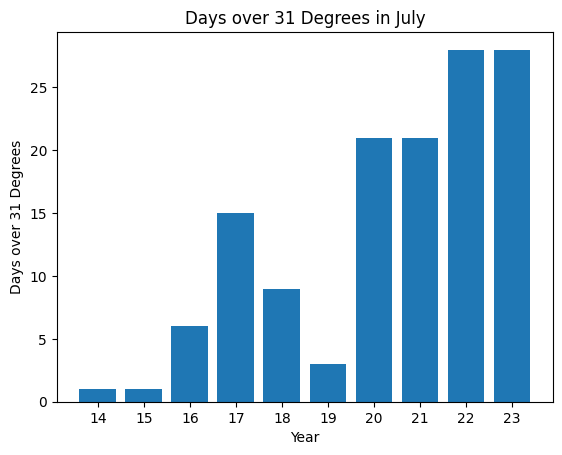

In [65]:
import matplotlib.pyplot as plt

plt.bar(hottest['days over 31'].index, hottest['days over 31'].values)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Days over 31 Degrees')
plt.title('Days over 31 Degrees in July')

In [66]:
 july=target.loc[(target['month'] == '07') & (target['year'] != '13') & (target['hour']=='15')]


In [67]:
july.set_index(['year','day'],inplace=True)

In [74]:
july.drop('days over 31',axis=1,inplace=True)

/var/folders/bk/np4nlklx4vs5wr6lym8k3w8w0000gn/T/ipykernel_92662/1903866960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july.drop('days over 31',axis=1,inplace=True)


In [75]:
july.groupby(['year']).mean().astype(int).sort_values(by='temp')

/var/folders/bk/np4nlklx4vs5wr6lym8k3w8w0000gn/T/ipykernel_92662/807721493.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  july.groupby(['year']).mean().astype(int).sort_values(by='temp')


,temp,temp_min,temp_max,humidity,heatIndex
year,,,,,
14,27,24,29,71,28
15,27,25,29,71,28
18,27,25,30,67,29
16,28,25,30,70,31
17,28,26,31,68,31
19,28,26,30,66,30
21,28,26,33,59,29
22,28,26,32,59,29
20,29,29,32,65,32
